# 1: nltk.tree.Tree

In this notebook, we will explore how to represent and manipulate syntax trees in NLTK.

Let's start by importing the syntax tree class.

In [1]:
from nltk.tree import Tree

## 1. Building trees

Let's build a syntax tree for the sentence *I met a Bill* which has the following syntax tree:

![tree](bill_tree.png)

There exist two ways to build syntax trees. First, we can build the tree recursively, starting with individual phrases and combining those into larger phrases and finally ending up with the entire sentence.

In [2]:
pron = Tree("PRP", ["I"])
verb = Tree("VBD", ["met"])
proper = Tree("NNP",["Bill"])

np_subj = Tree("NP", [pron])
np_obj = Tree("NP", [proper])
vp = Tree("VP", [verb, np_obj])
s = Tree("S", [np_subj, vp])

print(s)

(S (NP (PRP I)) (VP (VBD met) (NP (NNP Bill))))


Another way is to construct trees from a bracketed string which represents the nested phrases in the tree.

In [3]:
t = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NNP Bill))))")
print(t)

(S (NP (PRP I)) (VP (VBD met) (NP (NNP Bill))))


#### Another example:

Use `Tree.fromstring` to generate an nltk tree for the following syntax tree:

![tree](dog_tree.png)

In [4]:
t = Tree.fromstring("(S (NP (DT the) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))")
print(t)

(S (NP (DT the) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))


Construct the same tree but this time one node at a time using the `Tree` class constructor.

In [5]:
the = Tree("DT",["the"])
dog = Tree("NN", ["dog"])
saw = Tree("VBD", ["saw"])
cat = Tree("NN", ["cat"])
np_subj = Tree("NP", [the, dog])
np_obj = Tree("NP", [the, cat])
vp = Tree("VP", [saw, np_subj])
s = Tree("S", [np_obj, vp])
print(s)

(S (NP (DT the) (NN cat)) (VP (VBD saw) (NP (DT the) (NN dog))))


So far, we have used plain word forms as leaves in our syntax trees. However, `nltk` also supports an alternative representation where the leaves are `(token,POS)` pairs, where both `token` and `POS` are strings, for example `("The","DT")`. Construct a syntax tree for *The dog saw the cat* one node at a time using this alternative format. Here, for example `("The","DT")` and `("dog","NN")` will be direct leaf-nodes of an `NP` node. 

The string representation for your tree should look like this:
```
(S (NP The/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))
```

In [6]:
subject_node = Tree("NP",[("The","DT"),("dog","NN")])
object_node = Tree("NP",[("the","DT"),("cat","NN")])
vp_node = Tree("VP",[("saw","VBD"),object_node])

s = Tree("S",[subject_node,vp_node])
print(s)

(S (NP The/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))


## 2. Treebanks

Let's now import the Penn treebank and look at a few more complex trees.

In [7]:
from nltk.corpus import treebank

# The function parsed_sents() returns the syntax trees in the treebank.
syntax_trees = treebank.parsed_sents()

print(len(syntax_trees))

3914


In [8]:
tree = syntax_trees[0]

print(tree)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


## 3. Navigating trees

Each tree consists of a label and number of constituents (these are also called children or child nodes)

In [9]:
print(tree.label())

S


In [10]:
for phrase in tree:
    print(phrase)
    print("---")

(NP-SBJ
  (NP (NNP Pierre) (NNP Vinken))
  (, ,)
  (ADJP (NP (CD 61) (NNS years)) (JJ old))
  (, ,))
---
(VP
  (MD will)
  (VP
    (VB join)
    (NP (DT the) (NN board))
    (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
    (NP-TMP (NNP Nov.) (CD 29))))
---
(. .)
---


We can check how many children the tree has using `len()`

In [11]:
print(len(tree))

3


We can access children by indexing

In [12]:
print(tree[0])

(NP-SBJ
  (NP (NNP Pierre) (NNP Vinken))
  (, ,)
  (ADJP (NP (CD 61) (NNS years)) (JJ old))
  (, ,))


We can also iterate over all phrases which are nested in the current tree

In [13]:
for phrase in tree.subtrees():
    print(phrase)
    print("---")

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
---
(NP-SBJ
  (NP (NNP Pierre) (NNP Vinken))
  (, ,)
  (ADJP (NP (CD 61) (NNS years)) (JJ old))
  (, ,))
---
(NP (NNP Pierre) (NNP Vinken))
---
(NNP Pierre)
---
(NNP Vinken)
---
(, ,)
---
(ADJP (NP (CD 61) (NNS years)) (JJ old))
---
(NP (CD 61) (NNS years))
---
(CD 61)
---
(NNS years)
---
(JJ old)
---
(, ,)
---
(VP
  (MD will)
  (VP
    (VB join)
    (NP (DT the) (NN board))
    (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
    (NP-TMP (NNP Nov.) (CD 29))))
---
(MD will)
---
(VP
  (VB join)
  (NP (DT the) (NN board))
  (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
  (NP-TMP (NNP Nov.) (CD 29)))
---
(VB join)
---
(NP (DT the) (NN board))
---
(DT the)
---
(NN boa

Above will iterate through all the subtrees, and it goes inside a subtree to return another subtree. If we only want the subtrees with height equal to 2, we can instead:

In [20]:
t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
for s in t.subtrees(lambda t: t.height() == 2):
    print(s)

(D the)
(N dog)
(V chased)
(D the)
(N cat)


We can print the phrase which is associated with a given tree

In [14]:
print(tree.leaves())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


Tree height is an important property. The height of the following tree is 5 because it is the length of the longest chain starting at the root S and going all the way to a leaf node: S - VP - NP - NNP - Bill 

In [15]:
tree = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NNP Bill))))")
print(tree.height())

5


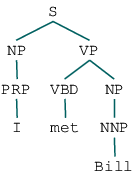

In [16]:
tree

The only trees with height 1 are _preterminals_ `(POS word)`. All phrases have height `>= 2`.

In [17]:
tree = Tree.fromstring("(NNP Mary)")
print(tree.height())

tree = Tree.fromstring("(NP (NNP Mary))")
print(tree.height())

2
3


In [18]:
print(list(tree.subtrees()))
print(tree.flatten())

[Tree('NP', [Tree('NNP', ['Mary'])]), Tree('NNP', ['Mary'])]
(NP Mary)


`tree.flatten()` returns a tree consisting of this tree’s root connected directly to its leaves, omitting all intervening non-terminal nodes.

In [19]:
t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
print(t.flatten())

(S the dog chased the cat)


`tree.pos()` returns a sequence of pos-tagged words extracted from the tree.

In [21]:
t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
t.pos()

[('the', 'D'), ('dog', 'N'), ('chased', 'V'), ('the', 'D'), ('cat', 'N')]

There is also one method we will use later, `tree.productions()` generates the productions that correspond to the non-terminal nodes of the tree. For each subtree of the form (P: C1 C2 … Cn) this produces a production of the form P -> C1 C2 … Cn.

In [22]:
t = Tree.fromstring("(S (NP (D the) (N dog)) (VP (V chased) (NP (D the) (N cat))))")
t.productions() 

[S -> NP VP,
 NP -> D N,
 D -> 'the',
 N -> 'dog',
 VP -> V NP,
 V -> 'chased',
 NP -> D N,
 D -> 'the',
 N -> 'cat']

## 4. Recursion on trees

Trees are a recursive data structure--A tree consists of phrases, each of which is itself a tree, or a leaf. Therefore, recursion is a natural way to process trees.

Let's compare the 10 most common word types in subject NPs (NP-SBJ) and regular NPs in the Penn Treebank.

In [23]:
def extract_phrases_from_sent(sentence, phrase_type):
    """recursively calls this function, loops inside a tree to extract 
    all tokens which has the given phrase type"""
    tokens = []
    for phrase in sentence:
        if phrase.label() == phrase_type:
            tokens.extend([tok.lower() for tok in phrase.leaves() if not "*" in tok])
        elif phrase.height() > 2:
            tokens.extend(extract_phrases_from_sent(phrase, phrase_type))
    return tokens

def extract_phrases(treebank, phrase_type):
    """returns tokens from a treebank.parsed_sents(), given a phrase type."""
    tokens = []
    for s in treebank:
        tokens.extend(extract_phrases_from_sent(s,phrase_type))
    return tokens

from collections import Counter

np_sbj_types = Counter(extract_phrases(treebank.parsed_sents(),"NP-SBJ"))
np_types = Counter(extract_phrases(treebank.parsed_sents(),"NP"))

print("NP-SBJ types:")
total_np_sbj = sum(np_sbj_types.values())   # count the total number
for w, c in np_sbj_types.most_common(10):
    print(w,c/total_np_sbj)
print()

print("NP types:")
total_np = sum(np_types.values())           # count the total number
for w, c in np_types.most_common(10):
    print(w,c/total_np)


NP-SBJ types:
the 0.08631905007743934
, 0.05570469798657718
of 0.028239545689210117
it 0.020134228187919462
a 0.017656169334021685
's 0.015384615384615385
mr. 0.013319566339700568
he 0.013164687661331956
and 0.012700051626226123
they 0.010531750129065565

NP types:
the 0.06974942875953681
a 0.03444870454281399
of 0.03177646102009992
, 0.02523140079780024
and 0.0157429998838155
's 0.014600518957437745
in 0.014213237287479183
$ 0.013206304945586925
to 0.012238100770690524
for 0.007261531311723016


We can notice a few interesting tendencies:

1. Indefinite articles like "a" are less common in NP-SBJ and definite articles like "the" more common.
1. Subject pronouns "he" and "they" show up for NP-SBJ.
1. "$" is common in in general NPs (probably beacuse of the financial domain) but doesn't seem to be frequent in NP-SBJ.

## 5. Flattening nodes using the Tree.pos 

The Tree.pos member-function can be used to flatten a tree into a POS tagged sequence. For example, `tree1` can be flattened into a tagged sequence:

In [25]:
tree = Tree.fromstring("(S (NP (DT The) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))")
tree.pos()

[('The', 'DT'), ('dog', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('cat', 'NN')]

Write a function `flatten_nps` which uses `tree.pos` to flatten **all the NPs** in the input syntax tree. The function should also flatten all `(POS word)` trees into leaf-nodes `word/POS`. 

Given `tree1` as the input, the function should return the following syntax tree:

```
(S (NP the/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))
```

In [27]:
def flatten_nps(tree):
    if tree.height() == 2:
        return tree.pos()[0]     # extract the word from ('The', 'DT') tuple
    # this is further explained below:
    elif tree.label() == "NP":
        return Tree("NP",tree.pos())
    else: 
        # remember Tree("pos_tag", ["word"]) has this structure
        return Tree(tree.label(),[flatten_nps(node) for node in tree])

print(flatten_nps(tree))

(S (NP The/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))


`(Tree("NP",tree.pos())` will just flatten everything inside the NP.

In [29]:
tree = Tree.fromstring("(NP (DT The) (NN dog))")
str(Tree("NP",tree.pos()))

'(NP The/DT dog/NN)'